In [2]:
import wandb

#login to wandb

#sweep= 

#runs=sweep.runs.data 

import pandas as pd
import wandb
from tqdm import tqdm

api = wandb.Api()
entity, project = "st7ma784", "Bertscore"
runs = api.runs(entity + "/" + project)
metric_to_Grab=["F1"]
Group_by=[#"modelname",
"modelname",
"LSAVersion",
#"perfect_match",
#"padding_length"
]
ignore_values=["albert-base-v2","roberta-base"]
data={}
options={k:set() for k in Group_by}
print("Grabbing data:")
run_configs=set()
for run in tqdm(runs):
       
    if run.state == "finished" or run.summary.get("e_F1",-1)>0: #other check for all logging complete 
        hist=run.history()
        # print(hist)
        config=run.config
        #print(config)
        code="_".join(list(run.config.items()).sort())
        if not any([item in ignore_values for item in config.items()]) and config["batch_size"]==180 and code not in run_configs:
            run_configs.add(code)

            dictkeys=list(set(config.keys()).intersection(set(Group_by)))
            dictkeys.sort()
            for k in dictkeys:
                s=options[k]
                s.add(config.get(k,""))
                options[k]=s
            entry_name= "_".join([config.get(k,"") for k in dictkeys])
            #print(entry_name)

            dictkeys=set(hist.keys()).intersection(set(metric_to_Grab))
            for k in dictkeys:
                lis=data.get(entry_name,[])
                lis.extend(hist[k])
                data[entry_name]=lis
    
    
        # for k in dictkeys:
        #     summarydict[k].append(hist[k])



Grabbing data:


100%|██████████| 116/116 [00:40<00:00,  2.85it/s]


In [65]:
options

{'modelname': {'albert-base-v2',
  'bert-base-uncased',
  'distilbert-base-uncased',
  'facebook/bart-base',
  'roberta-base',
  'xlm-roberta-base'},
 'LSAVersion': {'my function',
  'none',
  'recursive fn',
  'recursive fn2 ',
  'recursive fn5',
  'stock'}}

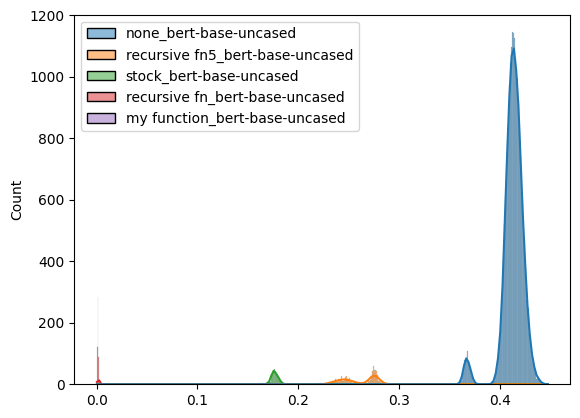

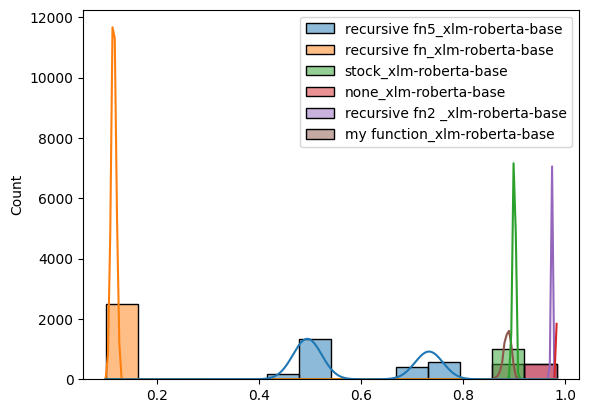

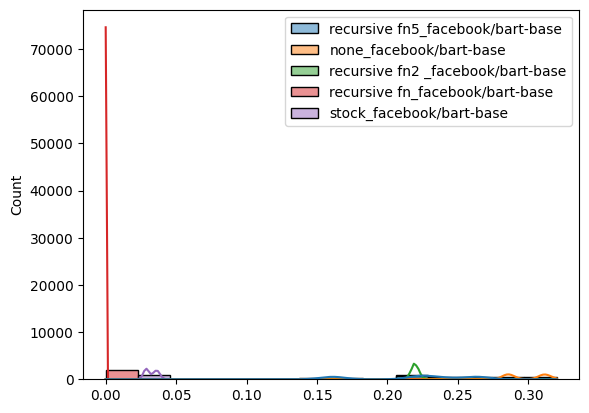

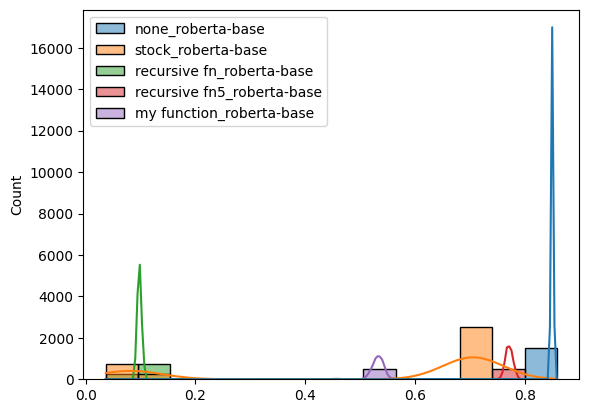

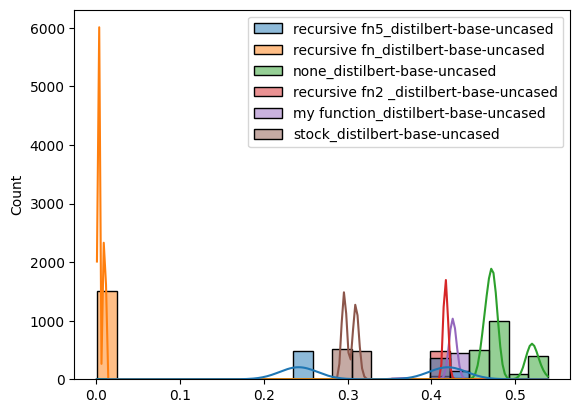

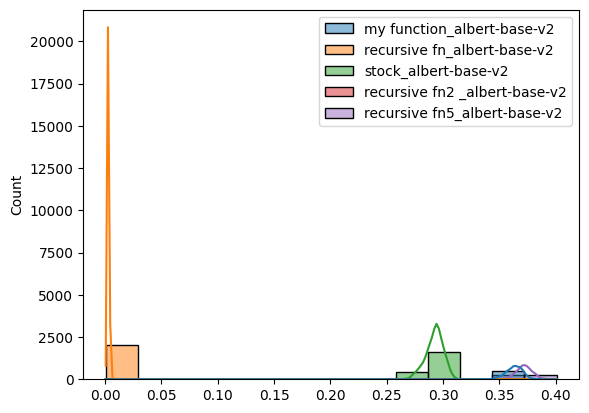

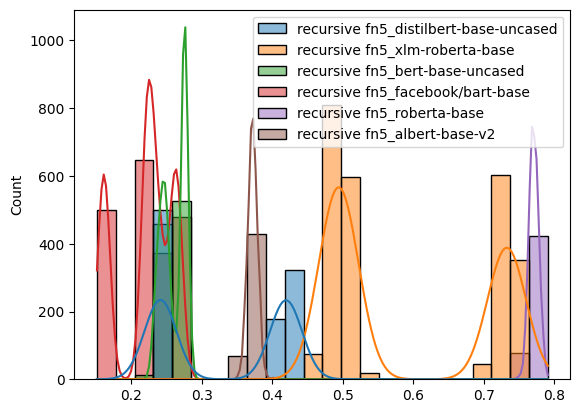

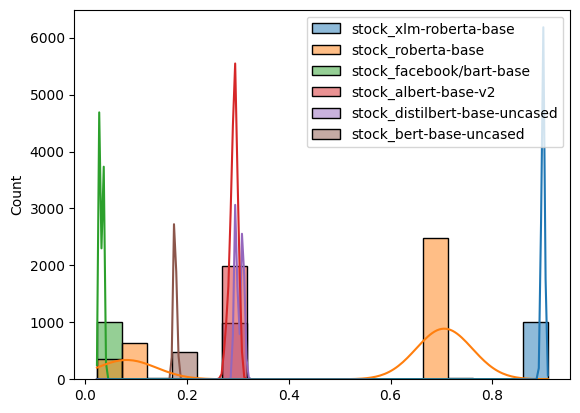

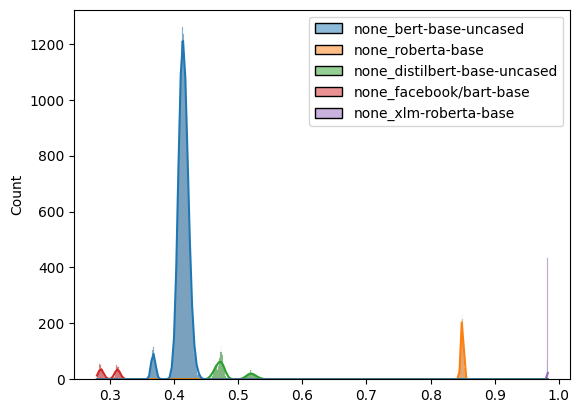

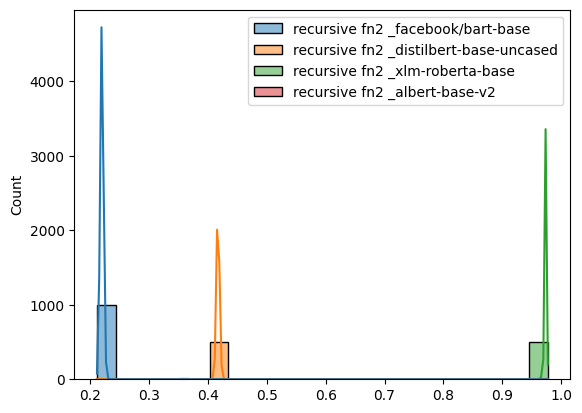

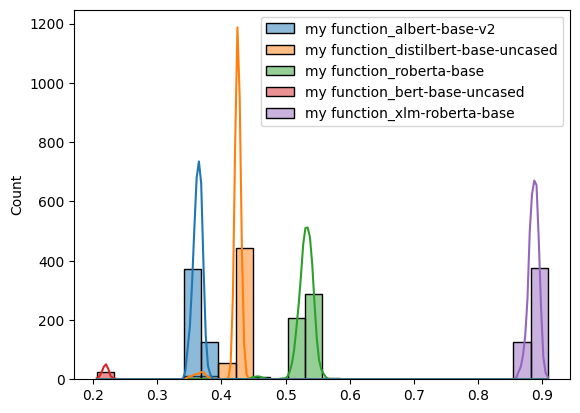

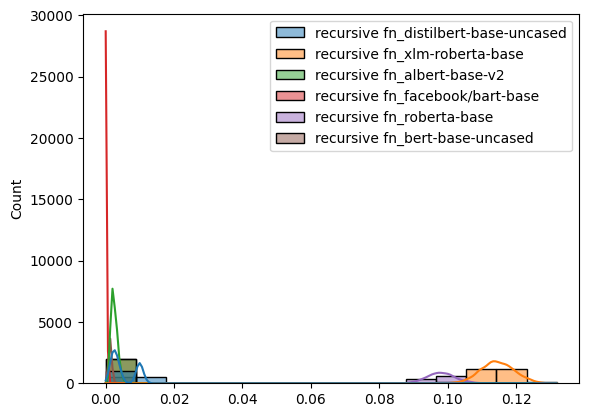

In [66]:
import seaborn as sns
# %matplotlib_inline
import matplotlib.pyplot as plt

figure=plt.figure()
i=0
for key in options:
    for entry in options[key]:
        #filter data by data.key() includes entry
        newdict={k:v for k,v in data.items() if entry in k.split("_")}
        figure=plt.figure(i)
        i+=1
        plot=sns.histplot(data=newdict, kde = True,)
        